In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_road_shape = pd.read_csv('/content/drive/MyDrive/DS201/data/q1_road_shape.csv')
df_traffic = pd.read_csv('/content/drive/MyDrive/DS201/data/q1_traffic.csv')
df_weather = pd.read_csv('/content/drive/MyDrive/DS201/data/q1_weather.csv')

In [2]:
import pandas as pd
df_road_shape = pd.read_csv('/content/drive/MyDrive/Projects/DS201/data/q1_road_shape.csv')
df_traffic = pd.read_csv('/content/drive/MyDrive/Projects/DS201/data/q1_traffic.csv')
df_weather = pd.read_csv('/content/drive/MyDrive/Projects/DS201/data/q1_weather.csv')

In [40]:
df_weather["temp_tmp"] = df_weather["temp"]/80

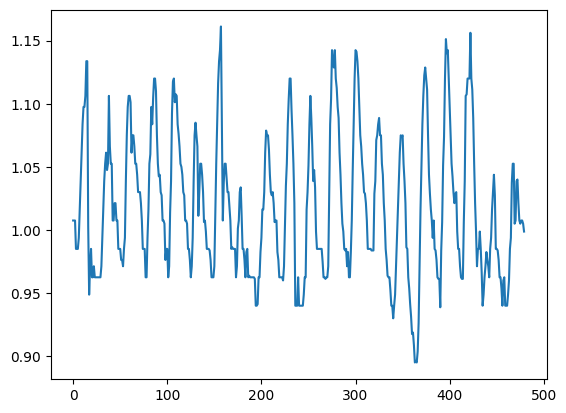

In [41]:
plt.plot(df_weather["temp_tmp"])

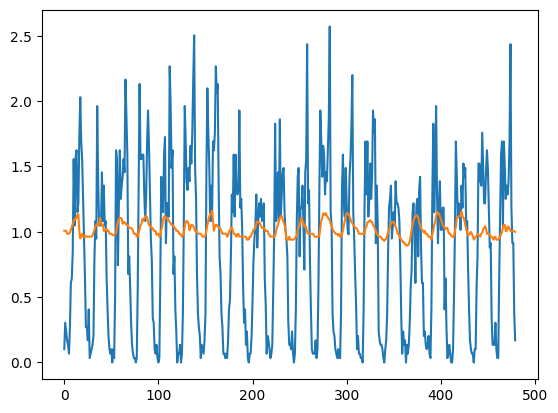

In [42]:
plt.plot(df_traffic_tmp["density"])
plt.plot(df_weather["temp_tmp"])

In [ ]:
df_weather.sample(5)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
258,hồ chí minh,2022-10-11T18:00:00,79.9,79.9,78.1,94.26,0.0,0,NaN,0,...,1009.0,88.8,4.2,12,0.0,0,30,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
463,hồ chí minh,2022-10-20T07:00:00,76.8,76.8,75.1,94.35,0.0,0,NaN,0,...,1011.0,88.9,5.3,73,0.3,1,10,Partially cloudy,partly-cloudy-day,"48894099999,48900099999,VVTS"
203,hồ chí minh,2022-10-09T11:00:00,82.4,92.4,78.8,88.91,0.0,0,NaN,0,...,1010.6,72.5,5.5,632,2.3,6,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS"
120,hồ chí minh,2022-10-06T00:00:00,80.6,87.1,77.0,88.84,0.0,0,NaN,0,...,1011.0,50.0,6.2,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
323,hồ chí minh,2022-10-14T11:00:00,86.0,95.2,75.2,70.29,0.0,0,NaN,0,...,1006.6,100.0,6.2,566,2.0,6,10,Overcast,cloudy,"48900099999,VVTS"


In [ ]:
df_road_shape.sample(2)

,segment_id,streetName,shape,connected_segment_ids
289,-17040019109185,Hẻm 391 Trần Hưng Đạo,"[(10.75869, 106.68979), (10.75853, 106.68995)]","[17040019109185, 17040021027651, -170400189302..."
891,-17040019534107,Đường Nguyễn Đình Chiểu,"[(10.79051, 106.70148), (10.79096, 106.7019)]","[-17040019288927, -17040019534107, 17040018789..."


In [ ]:
df_traffic.shape

(2179200, 9)

# Preprocess

In [3]:
def get_start_time(time):
  return time[:time.index("-") - 1]

df_traffic["start_time"] = df_traffic["time"].apply(get_start_time)

In [4]:
def extract_date(datetime):
    return datetime.split('T')[0]

def extract_time(datetime):
    time = datetime.split('T')[1]
    time = time[:-3]
    if time[0] == '0':
        time = time[1:]
    return time

df_weather['date'] = df_weather['datetime'].apply(extract_date)
df_weather['start_time'] = df_weather['datetime'].apply(extract_time)

In [5]:
data = pd.merge(df_traffic, df_weather, on=['date', 'start_time'], how='inner')
data.sample(5)

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts,start_time,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
1451204,17040018884457,2022-10-05,15:00 - 16:00,50,major road,Đường Đinh Tiên Hoàng,"[{'latitude': 10.78847, 'longitude': 106.69956...",65.65,249,15:00,...,1007.0,72.5,6.2,638,2.3,6,30,"Rain, Partially cloudy",rain,"48900099999,VVTS"
1169125,17040018893286,2022-10-10,11:00 - 12:00,50,minor local road,Đường Pasteur,"[{'latitude': 10.76962, 'longitude': 106.70302...",66.03,114,11:00,...,1011.6,88.8,6.2,512,1.8,5,30,Partially cloudy,partly-cloudy-day,"48900099999,VVTS"
963587,-17040020182022,2022-10-07,9:00 - 10:00,30,local road,No Name,"[{'latitude': 10.79106, 'longitude': 106.70544...",12.08,2,9:00,...,1011.0,27.0,6.2,606,2.2,6,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS"
998939,-17040020436712,2022-10-04,10:00 - 11:00,50,local road,Đường Phạm Ngọc Thạch,"[{'latitude': 10.78077, 'longitude': 106.69793...",21.32,78,10:00,...,1011.0,88.9,6.3,786,2.8,8,30,Partially cloudy,partly-cloudy-day,"48894099999,48900099999,VVTS"
159855,-17040018873461,2022-10-15,0:00 - 1:00,30,local road,Đường Nguyễn Khắc Nhu,"[{'latitude': 10.76234, 'longitude': 106.69402...",31.73,0,0:00,...,1006.0,88.8,5.7,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"


In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#for warning
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.isnull().sum()

segment_id                  0
date                        0
time                        0
speedLimit                  0
frc                         0
streetName                  0
shape                       0
distance                    0
segmentProbeCounts          0
start_time                  0
name                        0
datetime                    0
temp                        0
feelslike                   0
dew                         0
humidity                    0
precip                      0
precipprob                  0
preciptype            1516360
snow                        0
snowdepth                   0
windgust                    0
windspeed                   0
winddir                     0
sealevelpressure            0
cloudcover                  0
visibility                  0
solarradiation              0
solarenergy                 0
uvindex                     0
severerisk                  0
conditions                  0
icon                        0
stations  



# LSTM đa biến cho mọi đoạn đường

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

def get_start_time(time):
  return time[:time.index("-") - 1]

def to_sequences(dataset, seq_size=1):
    x = []
    y = []
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
    return np.array(x),np.array(y)

SEQ_SIZE = 10
FEATURE_SIZE = 32

In [ ]:
segments = data["segment_id"].unique()
segments

array([-17040019559514, -17040018864243, -17040020088759, ...,
        17040035666660,  17040035663318,  17040035034471])

In [ ]:
import json

with open('/content/drive/MyDrive/DS201/source_codes/lstm_losses.json', 'r') as json_file:
    lstm_file = json.load(json_file)

selected_segments = np.array(list(lstm_file.keys()))
selected_segments = selected_segments[-40:]
selected_segments = np.append(selected_segments, '-17040021066708')

In [ ]:
mse = []
r2 = []

for _ in list(lstm_file.keys()):
    mse.append(lstm_file[_]['mse_loss'])
    r2.append(lstm_file[_]['r2_score'])

print('MSE avg:', np.mean(mse), '. R2 avg:', np.mean(r2))

MSE avg: 0.016572597083314294 . R2 avg: 0.6298171585467268


In [ ]:
selected_segments

array(['-17040019894624', '17040022083730', '-17040020397113',
       '17040021756172', '-17040035666666', '17040035666642',
       '17040019287420', '17040026299125', '-17040020302420',
       '17040018903770', '17040035040102', '17040021931033',
       '17040019883175', '17040020417285', '17040023415444',
       '17040018866808', '-17040018925599', '17040023832682',
       '-17040035068217', '17040035666688', '17040019403155',
       '17040021333105', '17040020181126', '-17040019586809',
       '17040021238857', '-17040018886697', '17040021236090',
       '17040020652760', '17040021240988', '-17040020043056',
       '17040019260435', '17040023318674', '-17040023549465',
       '-17040019263323', '17040019275601', '17040024572431',
       '17040033535594', '-17040018853935', '17040020066435',
       '-17040021066708'], dtype='<U15')

In [7]:
selected_columns = ['segment_id', 'date', 'time', 'speedLimit', 'frc',
       'distance', 'segmentProbeCounts', 'start_time',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob',  'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'icon']

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for frc and streetName columns
frc_encoder = LabelEncoder()
streetName_encoder = LabelEncoder()

# Fit and transform the frc column
data['frc'] = frc_encoder.fit_transform(data['frc'])

# Fit and transform the streetName column
data['streetName'] = streetName_encoder.fit_transform(data['streetName'])


In [18]:
data.columns

Index(['segment_id', 'date', 'time', 'speedLimit', 'frc', 'streetName',
       'shape', 'distance', 'segmentProbeCounts', 'start_time', 'name',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'density'],
      dtype='object')

In [17]:
data.sample()

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts,start_time,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,density
705302,-17040035068065,2022-10-10,6:00 - 7:00,50,2,265,"[{'latitude': 10.78522, 'longitude': 106.7031}...",5.96,198,6:00,...,88.8,3.7,1,0.0,0,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",33.221477


In [27]:
corr_data = data[["density", "speedLimit", "frc", "streetName", "temp", "humidity", "cloudcover", "windspeed", "distance"]]

In [29]:
data.head()

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts,start_time,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,density
0,-17040019559514,2022-10-13,12:00 - 13:00,30,1,253,"[{'latitude': 10.79393, 'longitude': 106.68837...",64.73,6,12:00,...,27.0,6.2,881,3.2,9,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",0.092693
1,-17040018864243,2022-10-13,12:00 - 13:00,30,1,167,"[{'latitude': 10.76157, 'longitude': 106.69209...",9.18,27,12:00,...,27.0,6.2,881,3.2,9,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",2.941176
2,-17040020088759,2022-10-13,12:00 - 13:00,30,3,40,"[{'latitude': 10.794, 'longitude': 106.686}, {...",5.22,3,12:00,...,27.0,6.2,881,3.2,9,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",0.574713
3,-17040018764875,2022-10-13,12:00 - 13:00,30,1,208,"[{'latitude': 10.77012, 'longitude': 106.70071...",71.35,82,12:00,...,27.0,6.2,881,3.2,9,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",1.149264
4,-17040019148807,2022-10-13,12:00 - 13:00,30,1,177,"[{'latitude': 10.76892, 'longitude': 106.6976}...",29.56,36,12:00,...,27.0,6.2,881,3.2,9,10,Partially cloudy,partly-cloudy-day,"48900099999,VVTS",1.217862


In [31]:
def get_start_time(time):
  return time[:time.index("-") - 1]

data["start_time"] = data["time"].apply(get_start_time)
data["timstart_time"] = pd.to_datetime(data["date"] + " " + data["start_time"])

In [33]:
df_traffic_tmp = data[data["segment_id"] == -17040019148807]
df_traffic_tmp = df_traffic_tmp.sort_values("timstart_time")
df_traffic_tmp.reset_index(drop=True, inplace=True)

<Axes: >

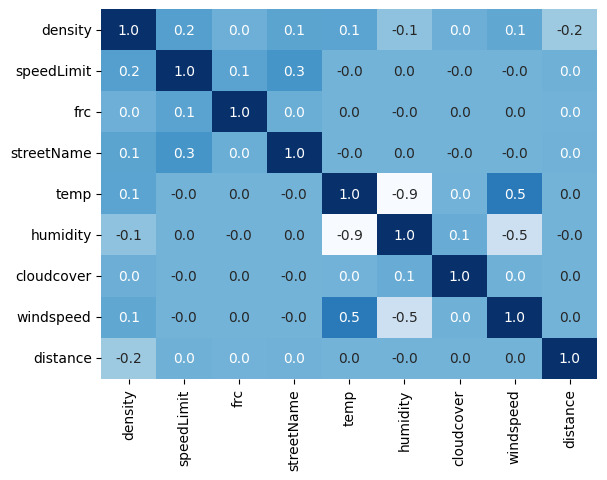

In [28]:
sns.heatmap(corr_data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [8]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def create_lag_features(df, n_lags):
    for i in range(1, n_lags + 1):
        df['target'] = df['density'].shift(i)
    df_supervised = df.dropna()
    return df_supervised

def supervised(data, NUM_SEQ):
    cols = ['speedLimit', 'frc', 'temp', 'feelslike',
       'icon', 'density']

    # load dataset
    dataset = data[cols]
    values = create_lag_features(dataset, NUM_SEQ)

    # integer encode direction
    encoder1 = LabelEncoder()
    values['frc'] = encoder1.fit_transform(values['frc'])

    encoder2 = LabelEncoder()
    values['icon'] = encoder2.fit_transform(values['icon'])

    # ensure all data is float
    values = values.astype('float32')

    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)

    return scaled


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
selected_segments = np.array([-17040020058817])
selected_segments = np.array([17040018939639])

In [ ]:
!rm -rf /content/drive/MyDrive/Projects/DS201/source_codes/checkpoints/*

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

SEQ_SIZE = 24
losses = {}
data["timstart_timee"] = pd.to_datetime(data["date"] + " " + data["start_time"])
data["density"] = data["segmentProbeCounts"]/data["distance"]

for segment_id in tqdm(selected_segments):
    df_traffic_tmp = data[data["segment_id"] == int(segment_id)]
    df_traffic_tmp = df_traffic_tmp.sort_values("timstart_timee")
    df_traffic_tmp.reset_index(drop=True, inplace=True)

    dataset = supervised(df_traffic_tmp, SEQ_SIZE)
    train, test = dataset[:384 ,:], dataset[384: , :]

    X_cols = ['speedLimit', 'frc', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob',  'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'icon']

    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    model = Sequential()
    model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=0)
    loss = model.evaluate(test_X, test_y, verbose=0)
    y_pred = model.predict(test_X)
    r2 = r2_score(test_y, y_pred)
    mae = mean_absolute_error(test_y, y_pred)

    losses[segment_id] = {"mse_loss": loss, "r2_score": r2}
    print(mae, " - ", loss, "-", r2)

  0%|          | 0/1 [00:00<?, ?it/s]

3/3 [==============================] - 1s 4ms/step


100%|██████████| 1/1 [00:07<00:00,  7.49s/it]

0.10573051  -  0.024898536503314972 - 0.2397890580392138


In [ ]:
mse = []
r2 = []

for segment_id in tqdm(selected_segments):
    mse.append(losses[segment_id]['mse_loss'])
    r2.append(losses[segment_id]['r2_score'])

print('MSE avg:', np.mean(mse), '. R2 avg:', np.mean(r2))

100%|██████████| 40/40 [00:00<00:00, 151967.54it/s]

MSE avg: 0.016598764338643636 . R2 avg: 0.5414513602125106


In [ ]:
import math
math.sqrt(0.0166)

0.12884098726725127

In [ ]:
import json

data_str_keys = {str(key): value for key, value in losses.items()}

with open('/content/drive/MyDrive/Projects/DS201/source_codes/multivariate-lstm_losses.json', 'w') as json_file:
    json.dump(data_str_keys, json_file)

NameError: name 'losses' is not defined

In [ ]:
len(data_str_keys)

NameError: name 'data_str_keys' is not defined

In [ ]:
# # biểu đồ mật độ phương tiện của đoạn đường 17040035094681
# import matplotlib.pyplot as plt
# plt.plot(df_traffic_tmp["density"])

In [ ]:
# # biểu đồ độ giảm loss của mô hình của đoạn đường 17040035094681
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

3/3 [==============================] - 0s 3ms/step


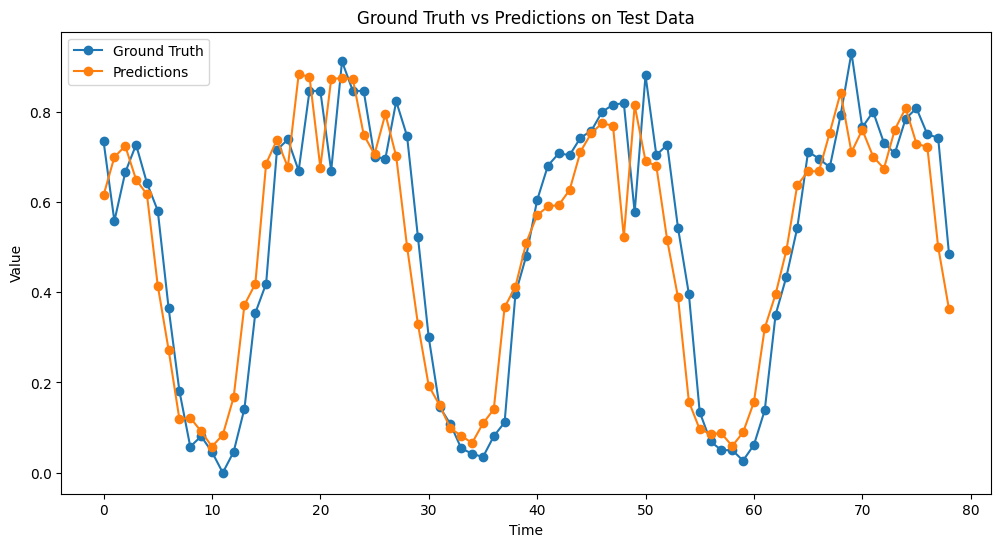

In [ ]:
# #biểu đồ độ fit của mô hình dự đoán so với ground truth của đoạn đường 17040035094681
predictions = model.predict(test_X)
#predictions_original = scaler.inverse_transform(predictions)
#y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Ground Truth', marker='o')
plt.plot(predictions, label='Predictions', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Ground Truth vs Predictions on Test Data')
plt.legend()
plt.show()

# Kết luận

Mô hình LSTM dự đoán khá tốt với loss chỉ đạt ... trên tập test, tuy nhiên bài toán này có tới hơn 4000 đoạn đường => cần hơn 4000 model để train cho từng đoạn đường => cần chi phí lớn và train lâu.